In [1]:
from scara import *
import spline
from pylab import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [11]:
def kinematics_test_plot(pos, a, b, limits):
    x = pos[0]
    y = pos[1]
    (alpha, beta) = inverse_kinematics((x, y), a, b, limits)
    (x_f, y_f) = forward_kinematics((alpha, beta), a, b)
    plot([0, a*np.cos(alpha), x_f], [0, b*np.sin(alpha), y_f])

In [12]:
a = 1
b = 1
limits = [[-3.14/2, 3.14/2], [-3.14*0.9, 3.14*0.9]]

points = [[0.5, 0], [0.5, 1], [1.5, 1], [1.5, 0], [0.5, 0]]

points_inv = [inverse_kinematics(p, a, b, limits) for p in points]
points_check = [forward_kinematics(p, a, b) for p in points_inv]
points_check

[(0.5, 0.0),
 (0.50000000000000022, 1.0),
 (1.5, 1.0000000000000002),
 (1.5, 0.0),
 (0.5, 0.0)]

(-0.5, 2.0, -1.5, 1.5)

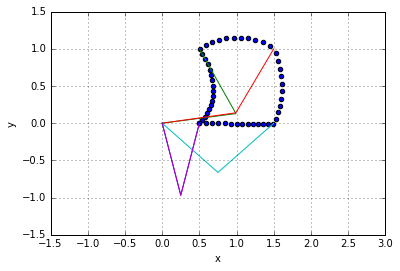

In [13]:
traj = spline.SplineTrajectory(points_inv, start_dir=None, end_dir=None, roundness=0.1)
resolution = 0.1
sampled_traj = traj.get_sample_points(resolution)
positions = [point.position for point in sampled_traj]
positions = [forward_kinematics(p, a, b) for p in positions]
scatter(*zip(*positions))
xlabel('x')
ylabel('y')

for p in points:
    hold(True)
    kinematics_test_plot(p, a, b, limits)
    
grid(True)
axis('equal')